In [1]:
%matplotlib inline
#from typing import Dict, Tuple, List, Union, Iterable

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#from matplotlib.ticker import AutoMinorLocator
plt.style.use("lm")
import numpy as np
#import scipy.linalg as sl #expm
#import os
#import time
#import random
#import string
#import copy
#from tabulate import tabulate
import samplebase as sb

import path_utils as putils

In [2]:
from decimal import Decimal

def fexp(number):
    (sign, digits, exponent) = Decimal(number).as_tuple()
    return len(digits) + exponent - 1

def fman(number):
    return Decimal(number).scaleb(-fexp(number)).normalize()

def to_latex_value_with_err(value, err, n_round=1, include_math_env=False):
    assert abs(value) > abs(err)
    val_exp = fexp(value)
    err_2 = err / (10**val_exp)
    n_round = max(-1*fexp(err_2),n_round)
    err_man = round(err_2, n_round)
    val_man = round(fman(value), n_round)
    val_str = ("{:0." + str(n_round) + "f}").format(val_man)
    err_str = ("{:0." + str(n_round) + "f}").format(err_man)
    if val_exp==0:
        result = val_str + " \pm " + err_str
    else:
        result = r"( " + val_str + " \pm " + err_str + r")\times 10^" + "{" + str(val_exp) +"}"
    if include_math_env:
        result = r"$ " + result + r" $"
    return result

def to_latex_value(value, n_round=1, include_math_env=False):
    val_exp = fexp(value)
    val_man = round(fman(value), n_round)
    val_str = ("{:0." + str(n_round) + "f}").format(val_man)
    if val_exp==0:
        result = val_str
    else:
        result = val_str + r"\times 10^" + "{" + str(val_exp) +"} "
    
    if include_math_env:
        result = r"$ " + result + r" $"
    return result

print(to_latex_value_with_err(1e-3, 0.5e-6))
print(to_latex_value(4e-3))
print(to_latex_value_with_err(1e-3, 0.5e-6, include_math_env=True))
print(to_latex_value(4e-3, include_math_env=True))
print(to_latex_value(1.3))
print(to_latex_value_with_err(1.2, 1.1))

( 1.0000 \pm 0.0005)\times 10^{-3}
4.0\times 10^{-3} 
$ ( 1.0000 \pm 0.0005)\times 10^{-3} $
$ 4.0\times 10^{-3}  $
1.3
1.2 \pm 1.1


In [3]:
def cluster_along_arg(samples, arg_key, arg_values):
    """
    Transform list of samples into a dictionary that maps 
    from arg_value (described by arg_key) to the clustered 
    samples list.
    """
    clustered_samples = dict()
    for arg_value in arg_values:
        clustered_samples[arg_value] = []
    
    for sample in samples:
        for arg_value in arg_values:
            if sample.args[arg_key] == arg_value:
                clustered_samples[arg_value].append(sample)
    
    return clustered_samples

In [4]:
def plot_overview(plot_functions, n_rows=1, n_cols=3, size_factor=1.):
    plt.figure(1, figsize=(5*n_cols*size_factor,3.6*n_rows*size_factor))
    n_plots = n_rows * n_cols
    idx = 1
    for pf in plot_functions:
        if idx > n_plots:
            break
        plt.subplot(n_rows, n_cols, idx)
        #plt.xscale("log")
        #secondrow = (idx in [7,8,9,10,11,12]) or (idx in [19,20,21,22,23,24]) or (idx in [31,32,33,34,35,36])
        #if secondrow:
        #    plt.gca().set_axis_bgcolor('#ededed')
        pf()
        idx += 1

    plt.subplots_adjust(top=0.96, bottom=0.04, left=0.07, right=0.97, hspace=0.4, wspace=0.35)
    #plt.tight_layout(pad=0.6, w_pad=2.0, h_pad=2.0)

In [5]:
data_dir = putils.data_dir(21)
data_dir

'/srv/public/chrisfr/workspace/data/rlearn-21'

In [6]:
all_samples = sb.list_of_samples(data_dir)
n_done = sum([1 for s in all_samples if s.done])
n_total = len(all_samples)
print(n_done, "/", n_total)

700 / 700


In [7]:
done_samples = [s for s in all_samples if s.done]

In [8]:
done_samples[0].args

{'alpha': array([1.67683294e-05, 2.22299648e-05, 2.94705170e-05, 3.90693994e-05,
        5.17947468e-05, 6.86648845e-05, 9.10298178e-05, 1.20679264e-04,
        1.59985872e-04, 2.12095089e-04]),
 'n_splits': 20,
 'gillespie_realisations': 1,
 'iid_id': 1,
 'traj_file_path': './gillespie_trajs_conced_1_3_normal.h5'}

In [9]:
done_samples[0].result["cv_result"]

[{'alpha': 1.67683293681101e-05,
  'cutoff': 0.0,
  'l1_ratio': 1.0,
  'score': [-4.565255474842183,
   -3.3171453289344615,
   -3.1071902912899,
   -2.7938155630972474,
   -3.310833606454495,
   -3.432831715130877,
   -3.13834397020145,
   -3.533298690376656,
   -3.793572519706558,
   -3.129832663878017,
   -5.0427704720873106,
   -3.5586568049578644,
   -3.1880329400600105,
   -2.945798143763349,
   -3.0470080390838516,
   -3.0435115642845822,
   -3.0658014618469087,
   -3.0520350782335135,
   -3.072113303759543,
   -3.7963801570879454]},
 {'alpha': 2.2229964825261955e-05,
  'cutoff': 0.0,
  'l1_ratio': 1.0,
  'score': [-4.562112881015352,
   -3.3169984025674646,
   -3.1072311010124385,
   -2.7937899142208864,
   -3.310828585808316,
   -3.432845517871934,
   -3.138296659937958,
   -3.5333629398426316,
   -3.7935606092188094,
   -3.129818463040712,
   -5.042932342939099,
   -3.5584486894804517,
   -3.188101958252067,
   -2.9457251539863303,
   -3.046980644035808,
   -3.043555731417434

In [10]:
# get cv_result for every alpha, gill_real, iid
cv_results = []
for ds in done_samples:
    for alpha_idx, current_alpha in enumerate(ds.args["alpha"]):
        element = {
            "alpha": current_alpha, 
            "gillespie_realisations": ds.args["gillespie_realisations"], 
            "iid": ds.args["iid_id"], 
            "scores": np.array(ds.result["cv_result"][alpha_idx]["score"])}
        cv_results.append(element)

In [11]:
import pandas as pd

/srv/public/chrisfr/miniconda3/envs/rlearn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [12]:
cv_results = pd.DataFrame(cv_results)

In [13]:
cv_results.head()

,alpha,gillespie_realisations,iid,scores
0,0.000017,1,1,"[-4.565255474842183, -3.3171453289344615, -3.1..."
1,0.000022,1,1,"[-4.562112881015352, -3.3169984025674646, -3.1..."
2,0.000029,1,1,"[-4.557982753053515, -3.316804766899628, -3.10..."
3,0.000039,1,1,"[-4.5525711287808335, -3.316550078269531, -3.1..."
4,0.000052,1,1,"[-4.545508856733657, -3.3162159803156794, -3.1..."


In [14]:
alphas = set()
timesteps = set()
noises = set()
folds = set()
iids = set()
gillespie_realisations = set()
for s in all_samples:
    if s.done:
        #alphas.add(s.args["alpha"])
        #timesteps.add(s.args["dt"])
        #noises.add(s.args["noise"])
        folds.add(s.args["n_splits"])
        gillespie_realisations.add(s.args["gillespie_realisations"])
        iids.add(s.args["iid_id"])
#alphas = np.fromiter(alphas, dtype=float)
#alphas.sort()
alphas = np.logspace(-6, 0, num=50)
timesteps = np.fromiter(timesteps, dtype=float)
timesteps.sort()
noises = np.fromiter(noises, dtype=float)
noises.sort()
folds = np.fromiter(folds, dtype=int)
folds.sort()
gillespie_realisations = np.fromiter(gillespie_realisations, dtype=int)
gillespie_realisations.sort()
iids = np.fromiter(iids, dtype=int)
iids.sort()
print(alphas)
print(timesteps)
print(noises)
print(folds)
print(gillespie_realisations)
print(iids)

[1.00000000e-06 1.32571137e-06 1.75751062e-06 2.32995181e-06
 3.08884360e-06 4.09491506e-06 5.42867544e-06 7.19685673e-06
 9.54095476e-06 1.26485522e-05 1.67683294e-05 2.22299648e-05
 2.94705170e-05 3.90693994e-05 5.17947468e-05 6.86648845e-05
 9.10298178e-05 1.20679264e-04 1.59985872e-04 2.12095089e-04
 2.81176870e-04 3.72759372e-04 4.94171336e-04 6.55128557e-04
 8.68511374e-04 1.15139540e-03 1.52641797e-03 2.02358965e-03
 2.68269580e-03 3.55648031e-03 4.71486636e-03 6.25055193e-03
 8.28642773e-03 1.09854114e-02 1.45634848e-02 1.93069773e-02
 2.55954792e-02 3.39322177e-02 4.49843267e-02 5.96362332e-02
 7.90604321e-02 1.04811313e-01 1.38949549e-01 1.84206997e-01
 2.44205309e-01 3.23745754e-01 4.29193426e-01 5.68986603e-01
 7.54312006e-01 1.00000000e+00]
[]
[]
[20]
[    1     2     5    10    20    50   100   200   500  1000  2000  5000
 10000 20000]
[0 1 2 3 4 5 6 7 8 9]


In [16]:
if False:
    samples = cluster_along_arg(done_samples, "gillespie_realisations", gillespie_realisations)
    for g in gillespie_realisations:
        samples[g] = cluster_along_arg(samples[g], "n_splits", folds)

In [17]:
def plot_validation(sample_list, mean=True, exclude_first_fold=True):
    #sorted_samples = sorted(sample_list, key=lambda x: x.args["alpha"])
    alpha_lower = 1e-9
    alpha_upper = 1e-2
    #sorted_samples = [s for s in sorted_samples if alpha_lower < s.args["alpha"] < alpha_upper ]
    #scores = np.array([ np.array(s.result["cv_result"][0]["score"]) for s in sorted_samples])
    #print(scores)
    alphas = []
    scores = []
    for s in sample_list:
        for result in s.result["cv_result"]:
            alphas.append(result["alpha"])
            scores.append(result["score"])
    alphas = np.array(alphas)
    scores = np.array(scores)
    n_samples = len(scores[0])
    #scores = np.mean(scores, axis=1)
    min_indices = np.argmin(-scores)
    #alphas = np.array([ s.args["alpha"] for s in sorted_samples])
    if mean:
        if exclude_first_fold:
            exclude_first = scores[:, 1:]
            mean_scores = np.mean(exclude_first, axis=1)
            err_scores = np.std(exclude_first, axis=1) / np.sqrt(n_samples-1 if n_samples>2 else 1)
        else:
            mean_scores = np.mean(scores, axis=1)
            err_scores = np.std(scores, axis=1) / np.sqrt(n_samples if n_samples>2 else 1)
        plt.errorbar(alphas, - mean_scores, yerr=err_scores, fmt=".")
        print("best mean score for alpha={}".format(alphas[np.argmin(-mean_scores)]))
    else:
        start_at = 1 if exclude_first_fold else 0
        for i in range(start_at, n_folds):
            #if i < 7:
            plt.plot(alphas, - scores[:,i], ".", label=str(i))
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("score")
    
def plot_trajs(sample_list, mean=True):
    sorted_samples = sorted(sample_list, key=lambda x: x.args["alpha"])
    traj_counts = [ s.result["counts"] for s in sorted_samples ]
    for counts in traj_counts[1:2]:
        plt.plot(counts, alpha=1.0)

In [18]:
n_folds=5
hyperparam_for_realisation = dict()

def plot_validation_pd(cv_results_for_g : pd.DataFrame, exclude_first_fold=True, mean=False, n_real=0):
    scores_for_alpha = []
    errs_for_alpha = []
    for a in alphas:
        slice_alpha = cv_results_for_g[cv_results_for_g.alpha == a]
        all_scores = np.array([x for x in slice_alpha.scores.values])
        #print(all_scores)
        if exclude_first_fold:
            scores = all_scores[:,1:]
        else:
            scores = all_scores
        
        if mean:
            # average over folds and iids
            n = scores.size
            mean_score = np.mean(scores)
            err_score = np.std(scores) / np.sqrt(n)
        else:
            # only average over iids
            n = scores.shape[0]
            mean_score = np.mean(scores, axis=0)
            err_score = np.std(scores, axis=0) / np.sqrt(n)
        
        scores_for_alpha.append(mean_score)
        errs_for_alpha.append(err_score)
    
    scores_for_alpha = np.array([x for x in scores_for_alpha])
    errs_for_alpha = np.array([x for x in errs_for_alpha])
    print(errs_for_alpha.shape)
    #if mean:
    min_indices = np.argmin(-scores_for_alpha, axis=0)
    #else:
    #    min_indices = 
    min_alpha = alphas[min_indices]
    print("n_real", n_real, "min_alpha", min_alpha)
    if mean:
        plt.errorbar(alphas, -scores_for_alpha, yerr=errs_for_alpha)
    else:
        for i in range(n_folds - 1 if exclude_first_fold else n_folds):
            plt.errorbar(alphas, -scores_for_alpha[:, i], yerr=errs_for_alpha[:,i],
                         label="fold "+str(i + 1 if exclude_first_fold else i))
    plt.legend()
    plt.title(r"$n_\mathrm{real}=" + str(n_real) + r"$, $\alpha_\mathrm{min}=$" + str(min_alpha if mean else ""))
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("score")
    
    if mean:
        hyperparam_for_realisation[n_real] = min_alpha

In [19]:
pfs = []
for g in gillespie_realisations:
    cv_results_g = cv_results[cv_results.gillespie_realisations == g]
    #plot_validation_pd(cv_results_g, exclude_first_score=True, mean=True)
    pfs.append(lambda df=cv_results_g, _g=g: plot_validation_pd(df, mean=True, exclude_first_fold=True, n_real=_g))

[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 1 min_alpha 0.0015264179671752333
(50,)
n_real 2 min_alpha 0.0004941713361323833
(50,)
n_real 5 min_alpha 0.0002811768697974231
(50,)
n_real 10 min_alpha 0.00021209508879201905


[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:49] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 20 min_alpha 0.00015998587196060574
(50,)
n_real 50 min_alpha 0.00015998587196060574
(50,)
n_real 100 min_alpha 9.102981779915228e-05
(50,)
n_real 200 min_alpha 9.102981779915228e-05


[samplebase] [2018-08-07 18:06:50] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:50] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:50] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:50] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-08-07 18:06:50] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 500 min_alpha 2.94705170255181e-05
(50,)
n_real 1000 min_alpha 2.94705170255181e-05
(50,)
n_real 2000 min_alpha 2.94705170255181e-05
(50,)
n_real 5000 min_alpha 1.2648552168552958e-05
(50,)
n_real 10000 min_alpha 1.67683293681101e-05


[samplebase] [2018-08-07 18:06:50] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 20000 min_alpha 1.67683293681101e-05


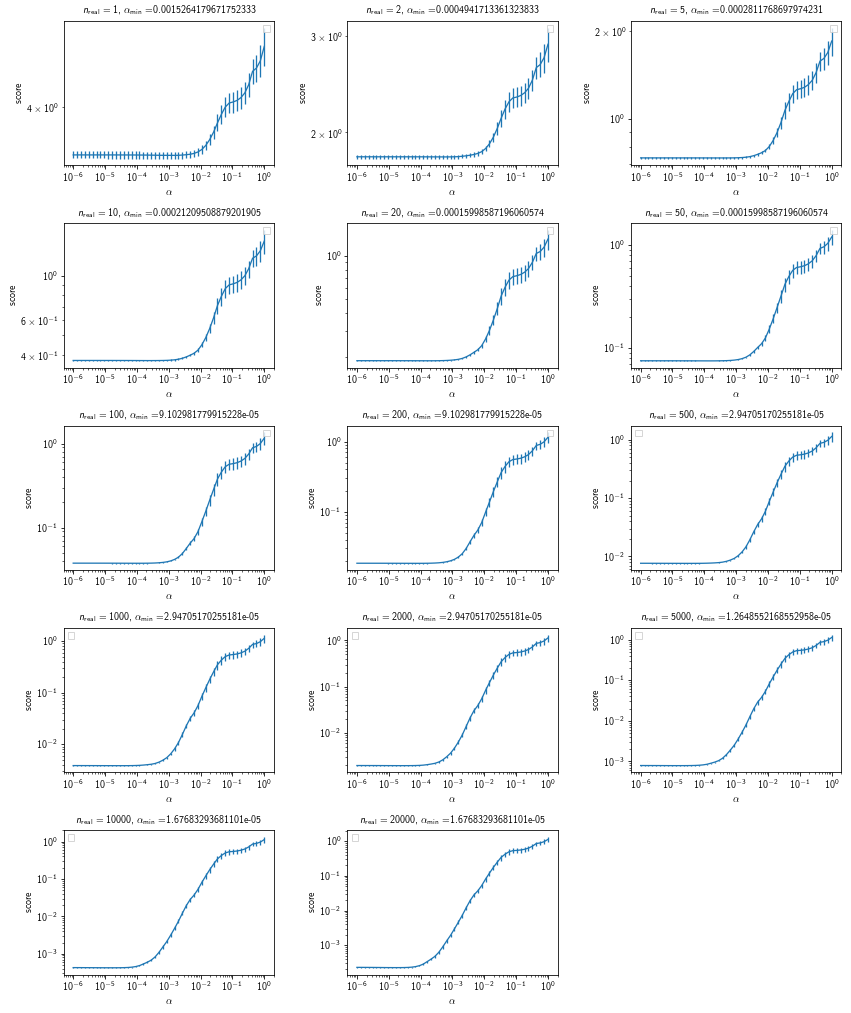

In [20]:
plot_overview(pfs, n_rows=5, n_cols=3, size_factor=0.8)
#plt.savefig("cv_gill_kfold_scale500_singlefolds_all_folds.pdf", bbox_inches="tight", transparent=True)

Text(0,0.5,'hyperparameter found by kfold')

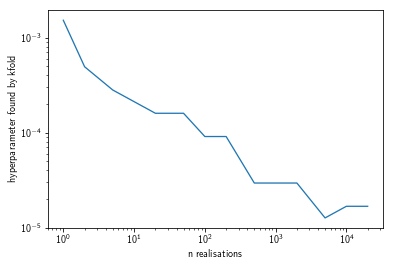

In [21]:
plt.plot([x for x in hyperparam_for_realisation.keys()], [x for x in hyperparam_for_realisation.values()])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("n realisations")
plt.ylabel("hyperparameter found by kfold")

In [22]:
if False:
    import pickle
    with open("hyperparam.pickle", "wb") as f:
        pickle.dump(hyperparam_for_realisation, f)

In [23]:
if False:
    import pickle
    with open("hyperparam.pickle", "rb") as f:
        hyperparam_for_realisation = pickle.load(f)

## l1 vs n_real
For each $n_\mathrm{real}$ and $iid$ solve the system and compare the according estimated rates with the desired rates.

In [24]:
import run_cv as rs

/srv/public/chrisfr/miniconda3/envs/rlearn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/public/chrisfr/miniconda3/envs/rlearn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/public/chrisfr/miniconda3/envs/rlearn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/public/chrisfr/miniconda3/envs/rlearn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [25]:
dt = 3e-3
target_time = 2.

In [26]:
# get desired rates
regulation_network, analysis = rs.get_regulation_network(dt, 0.0, target_time, gillespie_realisations=None, scale=1.)
desired_rates = regulation_network.desired_rates

obtaining regulation network with dt = 0.003
generating data by integrating the law of mass action with additive lma_noise 0.0
0.003
0.003


In [27]:
import time

(g,i)=(1,0) ...
find hyperparameter


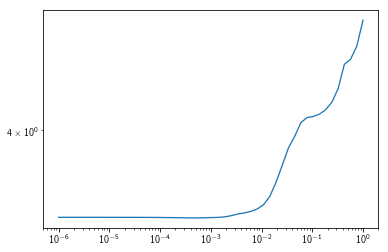

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0004941713361323833, lambda=1.0)!
status 0: Optimization terminated successfully.
245 / 30000 iterations
applying cutoff
... took 65.73596807406284 seconds
(g,i)=(1,1) ...
find hyperparameter


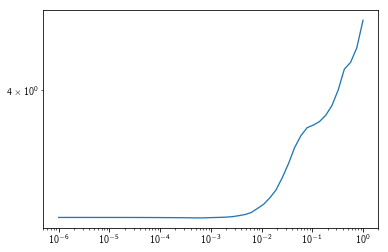

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0006551285568595509, lambda=1.0)!
status 0: Optimization terminated successfully.
222 / 30000 iterations
applying cutoff
... took 64.21547263895627 seconds
(g,i)=(1,2) ...
find hyperparameter


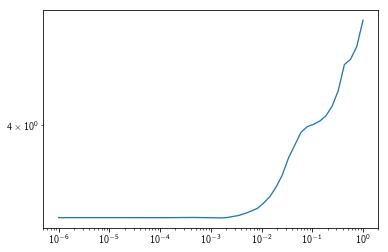

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0015264179671752333, lambda=1.0)!
status 0: Optimization terminated successfully.
222 / 30000 iterations
applying cutoff
... took 64.22034778504167 seconds
(g,i)=(1,3) ...
find hyperparameter


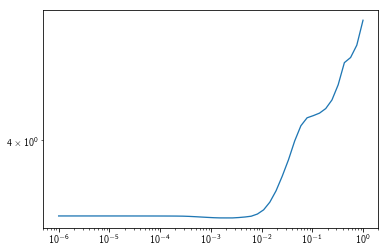

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0020235896477251575, lambda=1.0)!
status 0: Optimization terminated successfully.
179 / 30000 iterations
applying cutoff
... took 51.98283125006128 seconds
(g,i)=(1,4) ...
find hyperparameter


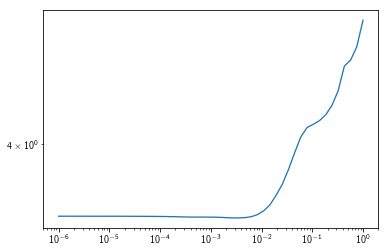

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0035564803062231283, lambda=1.0)!
status 0: Optimization terminated successfully.
162 / 30000 iterations
applying cutoff
... took 46.93204553297255 seconds
(g,i)=(1,5) ...
find hyperparameter


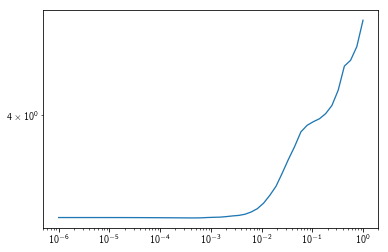

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0004941713361323833, lambda=1.0)!
status 0: Optimization terminated successfully.
194 / 30000 iterations
applying cutoff
... took 57.87136162805837 seconds
(g,i)=(1,6) ...
find hyperparameter


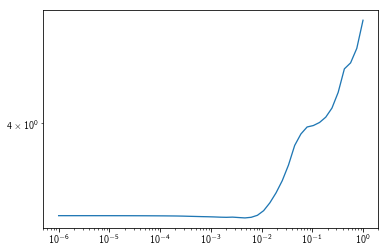

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.004714866363457394, lambda=1.0)!
status 0: Optimization terminated successfully.
145 / 30000 iterations
applying cutoff
... took 42.32636965904385 seconds
(g,i)=(1,7) ...
find hyperparameter


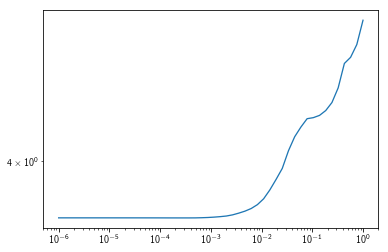

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
194 / 30000 iterations
applying cutoff
... took 56.06155032501556 seconds
(g,i)=(1,8) ...
find hyperparameter


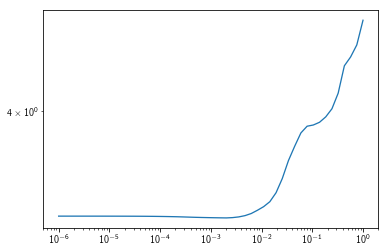

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0020235896477251575, lambda=1.0)!
status 0: Optimization terminated successfully.
174 / 30000 iterations
applying cutoff
... took 50.07361468707677 seconds
(g,i)=(1,9) ...
find hyperparameter


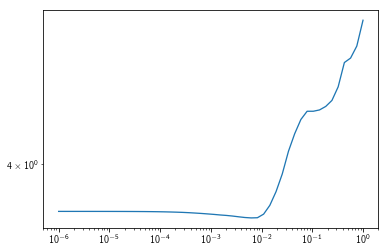

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0062505519252739694, lambda=1.0)!
status 0: Optimization terminated successfully.
122 / 30000 iterations
applying cutoff
... took 36.069321439019404 seconds
(g,i)=(2,0) ...
find hyperparameter


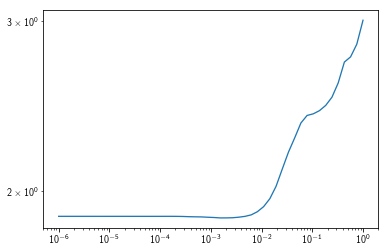

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0015264179671752333, lambda=1.0)!
status 0: Optimization terminated successfully.
199 / 30000 iterations
applying cutoff
... took 59.42796058696695 seconds
(g,i)=(2,1) ...
find hyperparameter


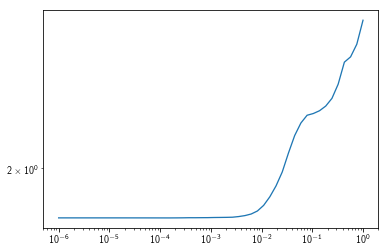

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
261 / 30000 iterations
applying cutoff
... took 74.76538660097867 seconds
(g,i)=(2,2) ...
find hyperparameter


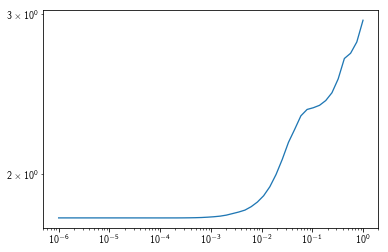

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
244 / 30000 iterations
applying cutoff
... took 69.71408934507053 seconds
(g,i)=(2,3) ...
find hyperparameter


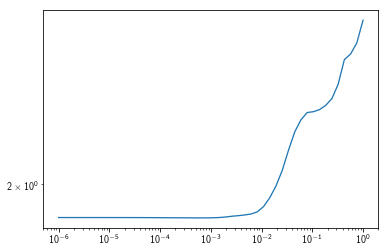

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0004941713361323833, lambda=1.0)!
status 0: Optimization terminated successfully.
253 / 30000 iterations
applying cutoff
... took 72.78582378604915 seconds
(g,i)=(2,4) ...
find hyperparameter


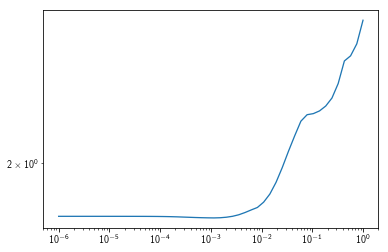

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0011513953993264468, lambda=1.0)!
status 0: Optimization terminated successfully.
209 / 30000 iterations
applying cutoff
... took 60.8590199399041 seconds
(g,i)=(2,5) ...
find hyperparameter


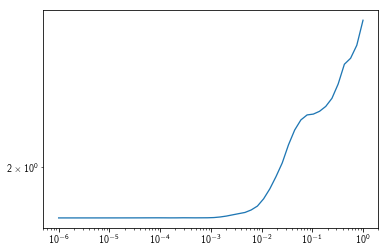

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
285 / 30000 iterations
applying cutoff
... took 81.13710465410259 seconds
(g,i)=(2,6) ...
find hyperparameter


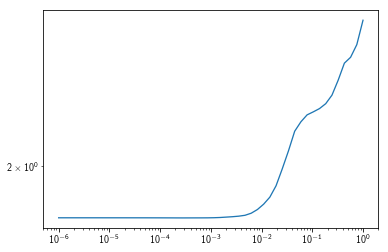

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
256 / 30000 iterations
applying cutoff
... took 73.77828443993349 seconds
(g,i)=(2,7) ...
find hyperparameter


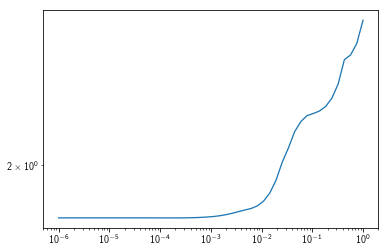

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
252 / 30000 iterations
applying cutoff
... took 73.4410999219399 seconds
(g,i)=(2,8) ...
find hyperparameter


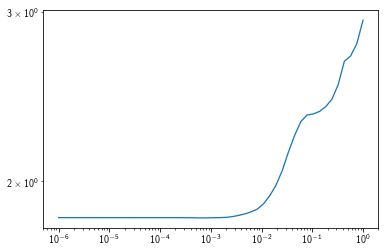

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0006551285568595509, lambda=1.0)!
status 0: Optimization terminated successfully.
247 / 30000 iterations
applying cutoff
... took 70.9811274089152 seconds
(g,i)=(2,9) ...
find hyperparameter


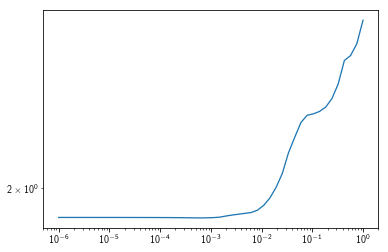

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0006551285568595509, lambda=1.0)!
status 0: Optimization terminated successfully.
254 / 30000 iterations
applying cutoff
... took 72.73362027201802 seconds
(g,i)=(5,0) ...
find hyperparameter


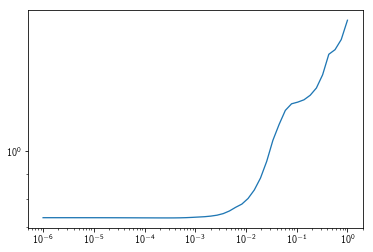

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
266 / 30000 iterations
applying cutoff
... took 75.7470738410484 seconds
(g,i)=(5,1) ...
find hyperparameter


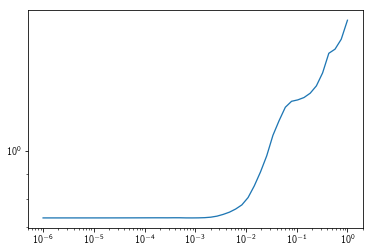

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.000868511373751352, lambda=1.0)!
status 0: Optimization terminated successfully.
228 / 30000 iterations
applying cutoff
... took 65.21862556098495 seconds
(g,i)=(5,2) ...
find hyperparameter


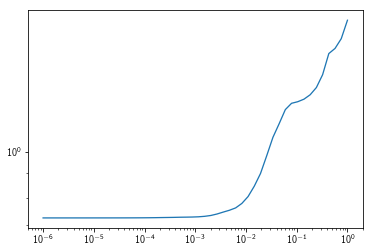

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
276 / 30000 iterations
applying cutoff
... took 78.78828984696884 seconds
(g,i)=(5,3) ...
find hyperparameter


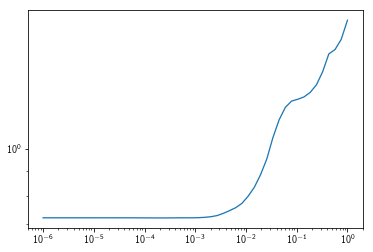

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
281 / 30000 iterations
applying cutoff
... took 80.39071257703472 seconds
(g,i)=(5,4) ...
find hyperparameter


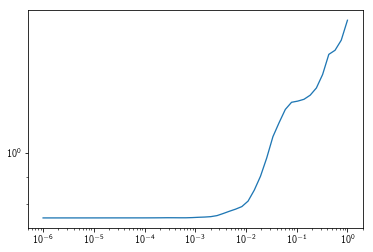

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
293 / 30000 iterations
applying cutoff
... took 83.36454163491726 seconds
(g,i)=(5,5) ...
find hyperparameter


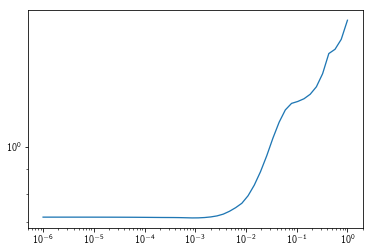

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.000868511373751352, lambda=1.0)!
status 0: Optimization terminated successfully.
230 / 30000 iterations
applying cutoff
... took 67.49809017195366 seconds
(g,i)=(5,6) ...
find hyperparameter


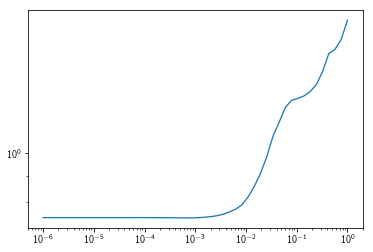

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.000868511373751352, lambda=1.0)!
status 0: Optimization terminated successfully.
231 / 30000 iterations
applying cutoff
... took 66.53169549291488 seconds
(g,i)=(5,7) ...
find hyperparameter


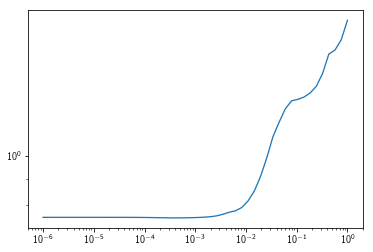

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0003727593720314938, lambda=1.0)!
status 0: Optimization terminated successfully.
265 / 30000 iterations
applying cutoff
... took 75.91000845399685 seconds
(g,i)=(5,8) ...
find hyperparameter


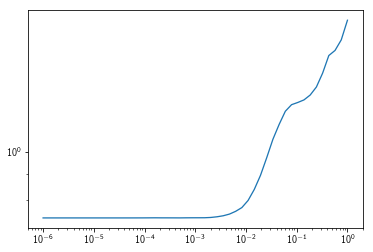

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
280 / 30000 iterations
applying cutoff
... took 82.62717620900366 seconds
(g,i)=(5,9) ...
find hyperparameter


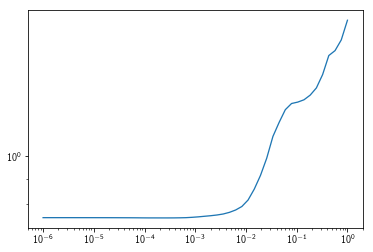

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
254 / 30000 iterations
applying cutoff
... took 72.57614911301062 seconds
(g,i)=(10,0) ...
find hyperparameter


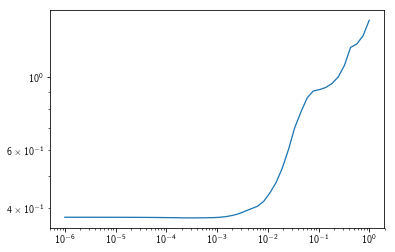

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
276 / 30000 iterations
applying cutoff
... took 79.19592484994791 seconds
(g,i)=(10,1) ...
find hyperparameter


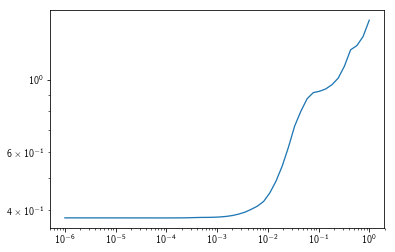

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
282 / 30000 iterations
applying cutoff
... took 80.11803233006503 seconds
(g,i)=(10,2) ...
find hyperparameter


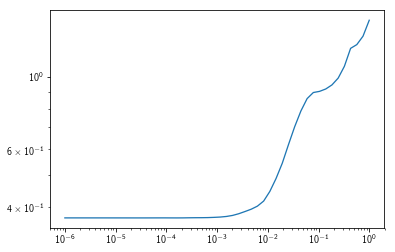

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
295 / 30000 iterations
applying cutoff
... took 91.84902241604868 seconds
(g,i)=(10,3) ...
find hyperparameter


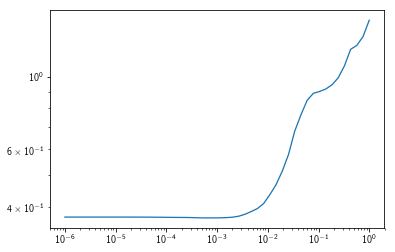

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0006551285568595509, lambda=1.0)!
status 0: Optimization terminated successfully.
233 / 30000 iterations
applying cutoff
... took 66.53912474296521 seconds
(g,i)=(10,4) ...
find hyperparameter


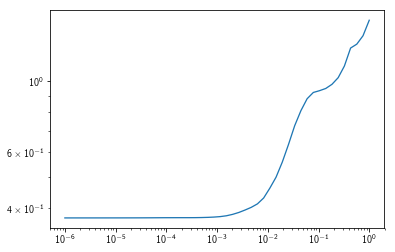

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
301 / 30000 iterations
applying cutoff
... took 86.16658406809438 seconds
(g,i)=(10,5) ...
find hyperparameter


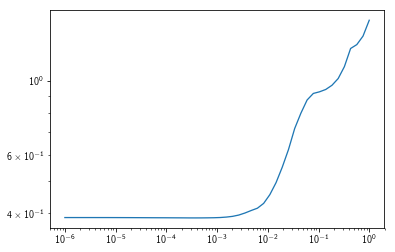

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0003727593720314938, lambda=1.0)!
status 0: Optimization terminated successfully.
273 / 30000 iterations
applying cutoff
... took 77.68705627205782 seconds
(g,i)=(10,6) ...
find hyperparameter


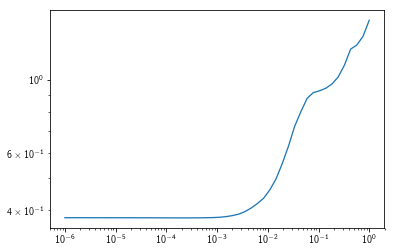

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
283 / 30000 iterations
applying cutoff
... took 80.66878310695756 seconds
(g,i)=(10,7) ...
find hyperparameter


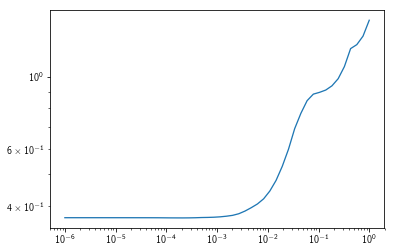

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
286 / 30000 iterations
applying cutoff
... took 81.56814321002457 seconds
(g,i)=(10,8) ...
find hyperparameter


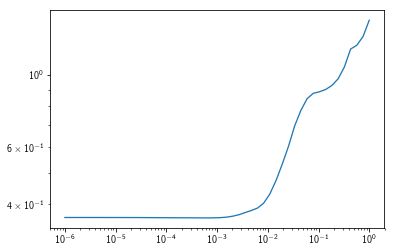

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0006551285568595509, lambda=1.0)!
status 0: Optimization terminated successfully.
245 / 30000 iterations
applying cutoff
... took 70.43287324800622 seconds
(g,i)=(10,9) ...
find hyperparameter


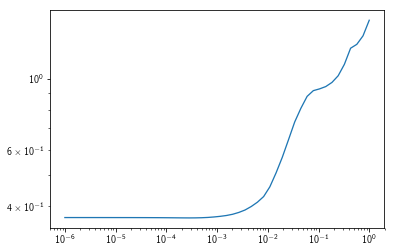

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
272 / 30000 iterations
applying cutoff
... took 77.44850358890835 seconds
(g,i)=(20,0) ...
find hyperparameter


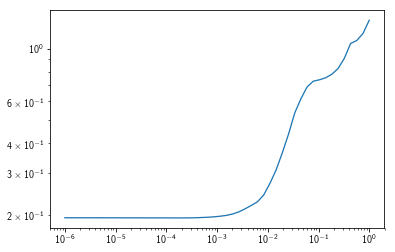

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
289 / 30000 iterations
applying cutoff
... took 81.64145788107999 seconds
(g,i)=(20,1) ...
find hyperparameter


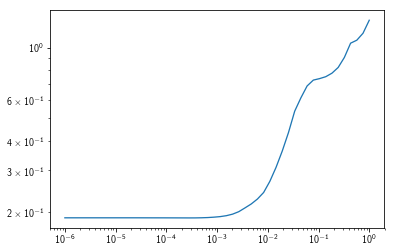

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
294 / 30000 iterations
applying cutoff
... took 83.6501793700736 seconds
(g,i)=(20,2) ...
find hyperparameter


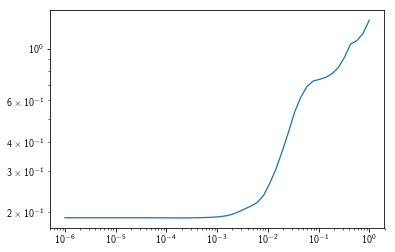

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
298 / 30000 iterations
applying cutoff
... took 84.92832186201122 seconds
(g,i)=(20,3) ...
find hyperparameter


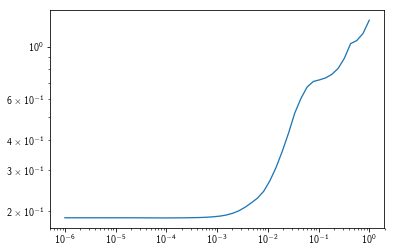

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
303 / 30000 iterations
applying cutoff
... took 93.3026479659602 seconds
(g,i)=(20,4) ...
find hyperparameter


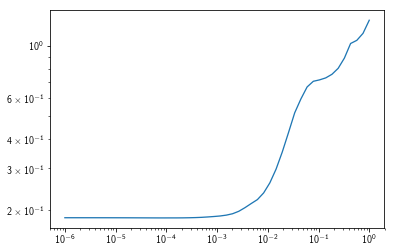

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
298 / 30000 iterations
applying cutoff
... took 84.91223641205579 seconds
(g,i)=(20,5) ...
find hyperparameter


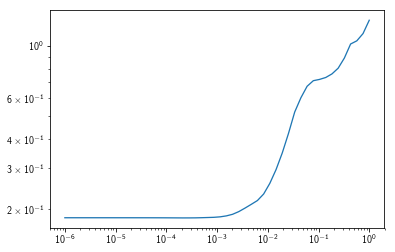

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
275 / 30000 iterations
applying cutoff
... took 78.67180139408447 seconds
(g,i)=(20,6) ...
find hyperparameter


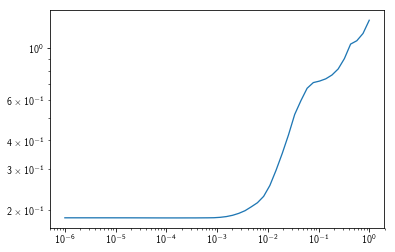

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
298 / 30000 iterations
applying cutoff
... took 86.25527184200473 seconds
(g,i)=(20,7) ...
find hyperparameter


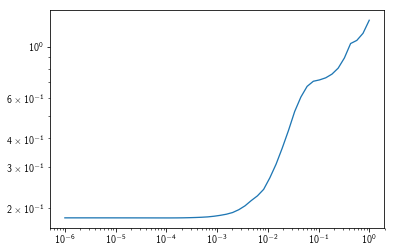

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
290 / 30000 iterations
applying cutoff
... took 82.34513340203557 seconds
(g,i)=(20,8) ...
find hyperparameter


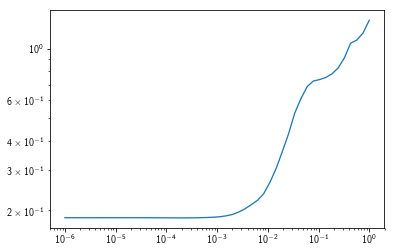

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
296 / 30000 iterations
applying cutoff
... took 84.88556718803011 seconds
(g,i)=(20,9) ...
find hyperparameter


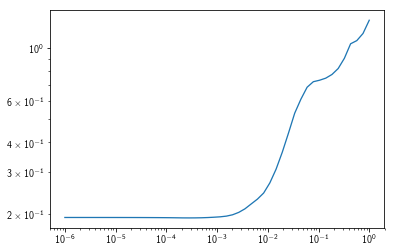

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
277 / 30000 iterations
applying cutoff
... took 78.68969379505143 seconds
(g,i)=(50,0) ...
find hyperparameter


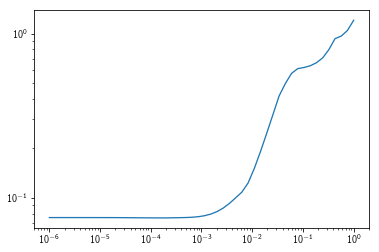

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
291 / 30000 iterations
applying cutoff
... took 82.92675025295466 seconds
(g,i)=(50,1) ...
find hyperparameter


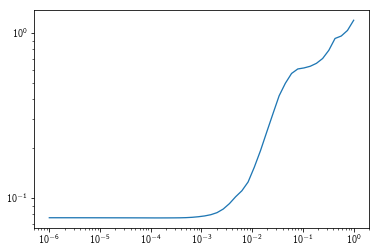

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
294 / 30000 iterations
applying cutoff
... took 83.4869720779825 seconds
(g,i)=(50,2) ...
find hyperparameter


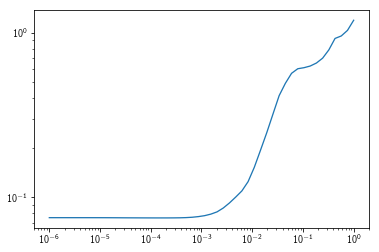

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
285 / 30000 iterations
applying cutoff
... took 81.06618506100494 seconds
(g,i)=(50,3) ...
find hyperparameter


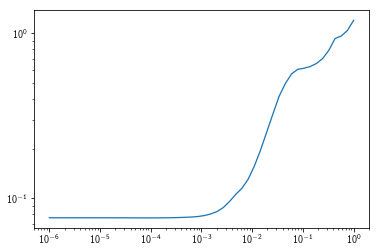

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
300 / 30000 iterations
applying cutoff
... took 85.93178123002872 seconds
(g,i)=(50,4) ...
find hyperparameter


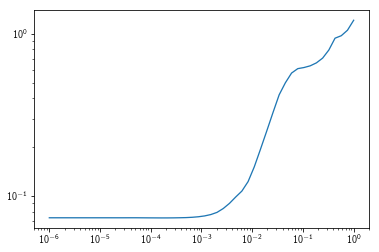

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
298 / 30000 iterations
applying cutoff
... took 85.43850780604407 seconds
(g,i)=(50,5) ...
find hyperparameter


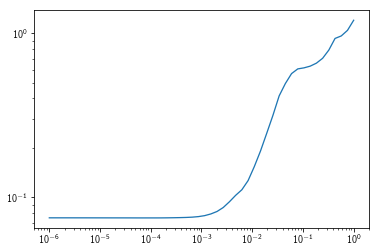

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
302 / 30000 iterations
applying cutoff
... took 85.77772210002877 seconds
(g,i)=(50,6) ...
find hyperparameter


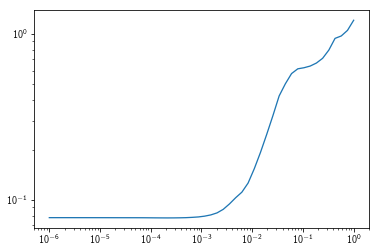

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
284 / 30000 iterations
applying cutoff
... took 81.01783572894055 seconds
(g,i)=(50,7) ...
find hyperparameter


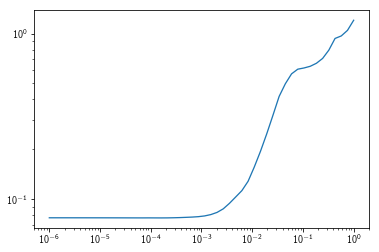

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
287 / 30000 iterations
applying cutoff
... took 81.34950674790889 seconds
(g,i)=(50,8) ...
find hyperparameter


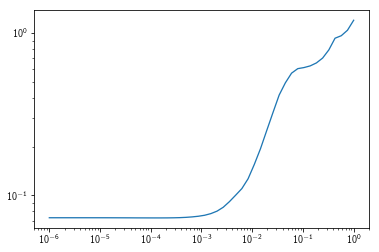

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
307 / 30000 iterations
applying cutoff
... took 86.54647186899092 seconds
(g,i)=(50,9) ...
find hyperparameter


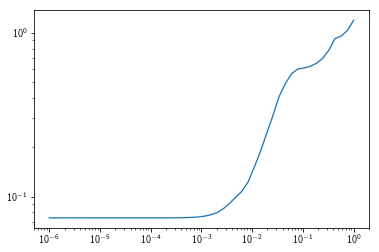

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
308 / 30000 iterations
applying cutoff
... took 87.28414701204747 seconds
(g,i)=(100,0) ...
find hyperparameter


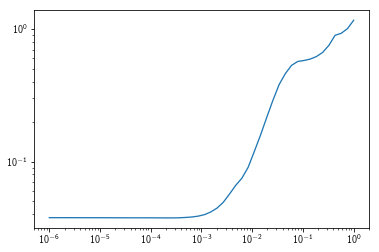

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
290 / 30000 iterations
applying cutoff
... took 82.57176859304309 seconds
(g,i)=(100,1) ...
find hyperparameter


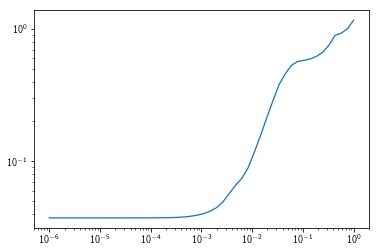

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=4.094915062380427e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
339 / 30000 iterations
applying cutoff
... took 96.63323630194645 seconds
(g,i)=(100,2) ...
find hyperparameter


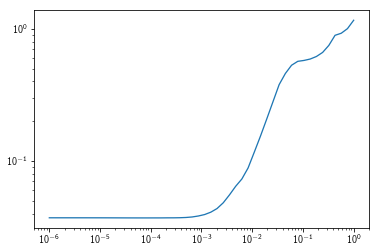

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
327 / 30000 iterations
applying cutoff
... took 92.66178931598552 seconds
(g,i)=(100,3) ...
find hyperparameter


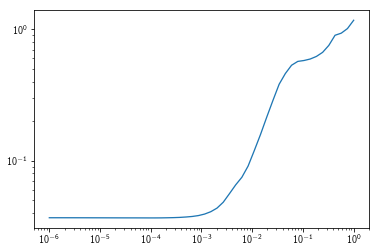

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
300 / 30000 iterations
applying cutoff
... took 85.17570065299515 seconds
(g,i)=(100,4) ...
find hyperparameter


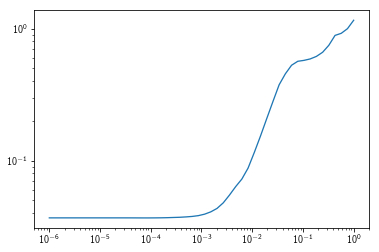

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
314 / 30000 iterations
applying cutoff
... took 89.36434110405389 seconds
(g,i)=(100,5) ...
find hyperparameter


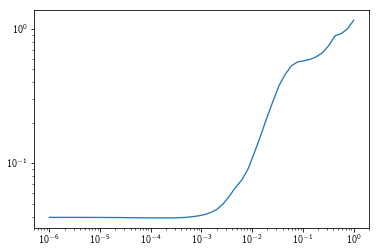

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
286 / 30000 iterations
applying cutoff
... took 81.88328076701146 seconds
(g,i)=(100,6) ...
find hyperparameter


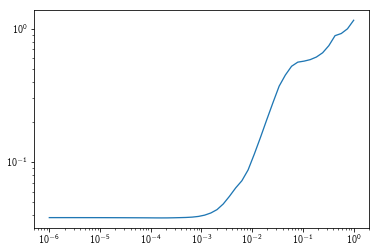

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
303 / 30000 iterations
applying cutoff
... took 86.23335942195263 seconds
(g,i)=(100,7) ...
find hyperparameter


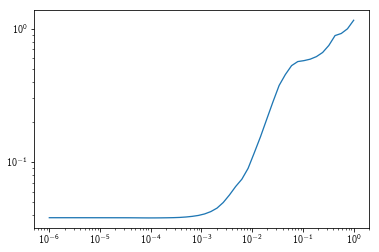

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
310 / 30000 iterations
applying cutoff
... took 88.22746607789304 seconds
(g,i)=(100,8) ...
find hyperparameter


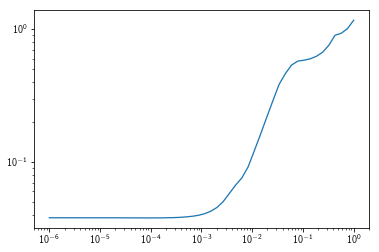

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
326 / 30000 iterations
applying cutoff
... took 92.15460895106662 seconds
(g,i)=(100,9) ...
find hyperparameter


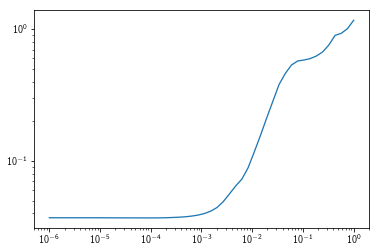

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
319 / 30000 iterations
applying cutoff
... took 90.19974901294336 seconds
(g,i)=(200,0) ...
find hyperparameter


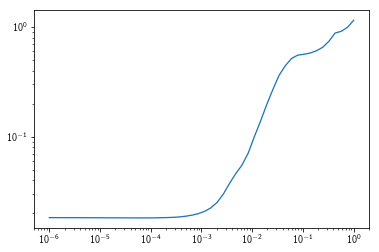

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
329 / 30000 iterations
applying cutoff
... took 92.81488238903694 seconds
(g,i)=(200,1) ...
find hyperparameter


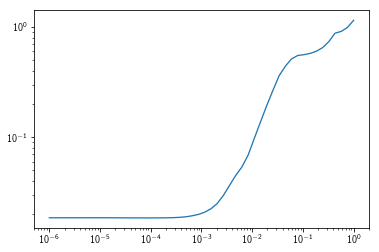

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
304 / 30000 iterations
applying cutoff
... took 86.51248636597302 seconds
(g,i)=(200,2) ...
find hyperparameter


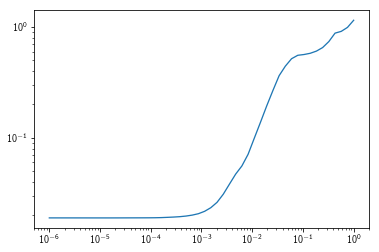

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
327 / 30000 iterations
applying cutoff
... took 93.55643220595084 seconds
(g,i)=(200,3) ...
find hyperparameter


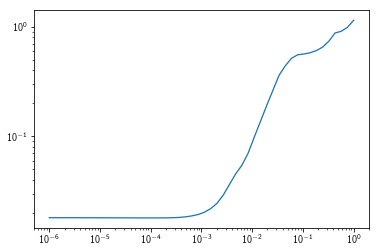

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
308 / 30000 iterations
applying cutoff
... took 87.57632722007111 seconds
(g,i)=(200,4) ...
find hyperparameter


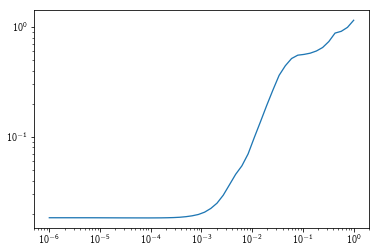

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
314 / 30000 iterations
applying cutoff
... took 89.76445862301625 seconds
(g,i)=(200,5) ...
find hyperparameter


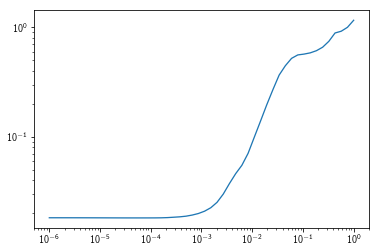

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
332 / 30000 iterations
applying cutoff
... took 94.49914839398116 seconds
(g,i)=(200,6) ...
find hyperparameter


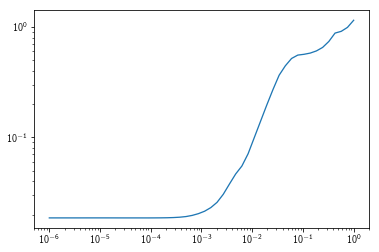

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
304 / 30000 iterations
applying cutoff
... took 89.96706995996647 seconds
(g,i)=(200,7) ...
find hyperparameter


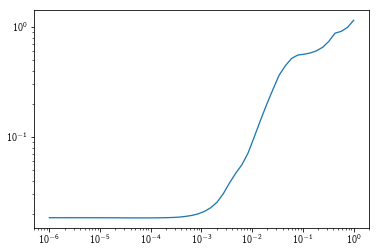

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
323 / 30000 iterations
applying cutoff
... took 91.9947344600223 seconds
(g,i)=(200,8) ...
find hyperparameter


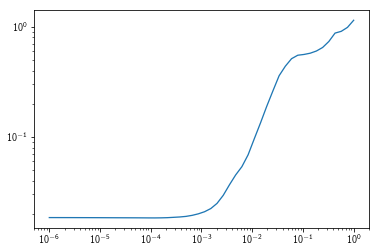

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
298 / 30000 iterations
applying cutoff
... took 89.5974768390879 seconds
(g,i)=(200,9) ...
find hyperparameter


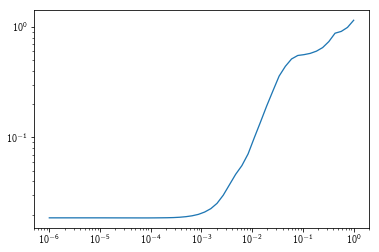

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
311 / 30000 iterations
applying cutoff
... took 88.98402422305662 seconds
(g,i)=(500,0) ...
find hyperparameter


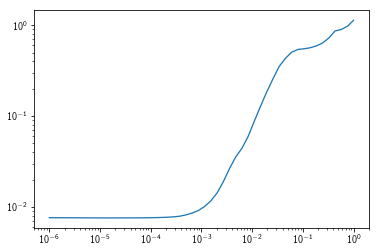

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
348 / 30000 iterations
applying cutoff
... took 98.76419292099308 seconds
(g,i)=(500,1) ...
find hyperparameter


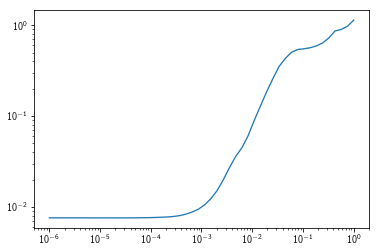

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
348 / 30000 iterations
applying cutoff
... took 99.3113880379824 seconds
(g,i)=(500,2) ...
find hyperparameter


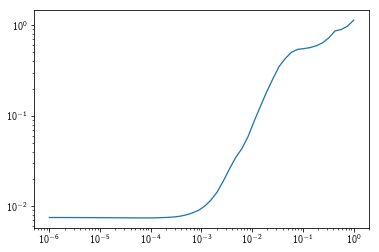

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
333 / 30000 iterations
applying cutoff
... took 94.89531754597556 seconds
(g,i)=(500,3) ...
find hyperparameter


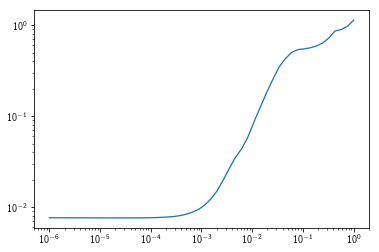

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
338 / 30000 iterations
applying cutoff
... took 97.57845868193544 seconds
(g,i)=(500,4) ...
find hyperparameter


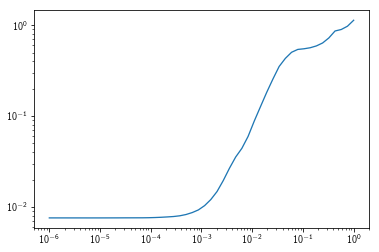

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=7.196856730011514e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
345 / 30000 iterations
applying cutoff
... took 97.69871818996035 seconds
(g,i)=(500,5) ...
find hyperparameter


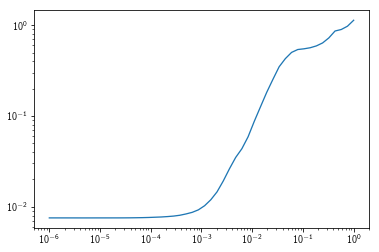

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
342 / 30000 iterations
applying cutoff
... took 97.58563109498937 seconds
(g,i)=(500,6) ...
find hyperparameter


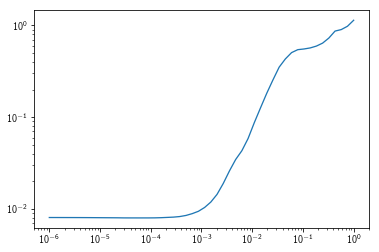

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
333 / 30000 iterations
applying cutoff
... took 93.90168839902617 seconds
(g,i)=(500,7) ...
find hyperparameter


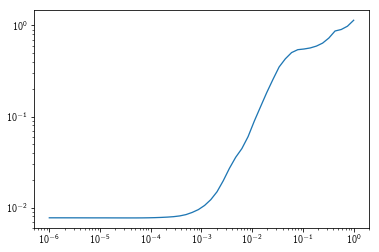

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
329 / 30000 iterations
applying cutoff
... took 95.1147963629337 seconds
(g,i)=(500,8) ...
find hyperparameter


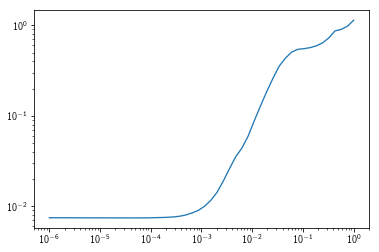

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
322 / 30000 iterations
applying cutoff
... took 95.98807989805937 seconds
(g,i)=(500,9) ...
find hyperparameter


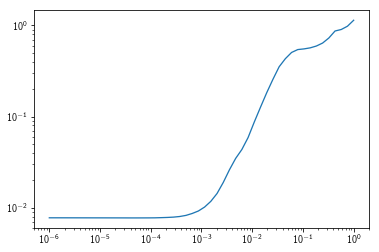

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
333 / 30000 iterations
applying cutoff
... took 94.69652073306497 seconds
(g,i)=(1000,0) ...
find hyperparameter


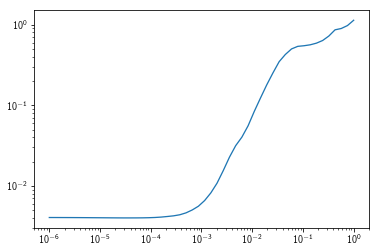

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
344 / 30000 iterations
applying cutoff
... took 97.23799390392378 seconds
(g,i)=(1000,1) ...
find hyperparameter


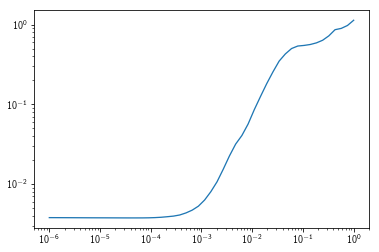

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
320 / 30000 iterations
applying cutoff
... took 90.67275154800154 seconds
(g,i)=(1000,2) ...
find hyperparameter


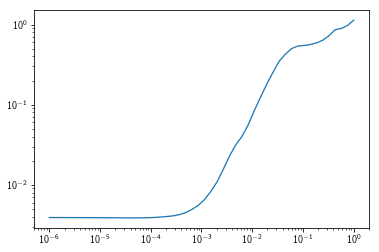

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
338 / 30000 iterations
applying cutoff
... took 95.82155454601161 seconds
(g,i)=(1000,3) ...
find hyperparameter


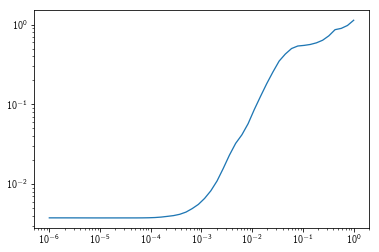

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.540954763499944e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
350 / 30000 iterations
applying cutoff
... took 101.1327925020596 seconds
(g,i)=(1000,4) ...
find hyperparameter


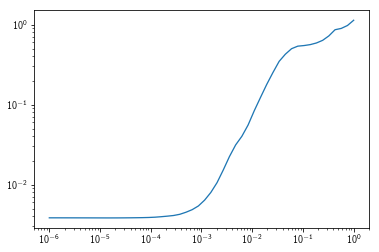

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
344 / 30000 iterations
applying cutoff
... took 97.42709667701274 seconds
(g,i)=(1000,5) ...
find hyperparameter


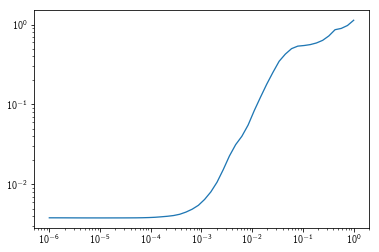

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
338 / 30000 iterations
applying cutoff
... took 95.10979278001469 seconds
(g,i)=(1000,6) ...
find hyperparameter


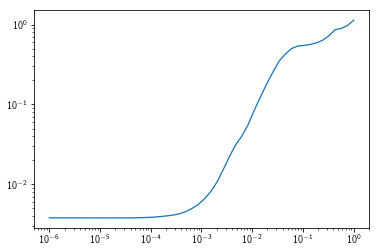

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
346 / 30000 iterations
applying cutoff
... took 97.91782575799152 seconds
(g,i)=(1000,7) ...
find hyperparameter


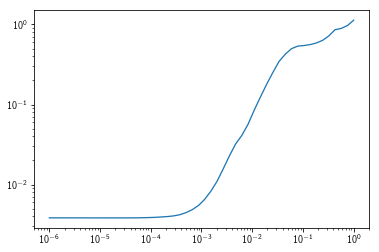

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
315 / 30000 iterations
applying cutoff
... took 89.7060626129387 seconds
(g,i)=(1000,8) ...
find hyperparameter


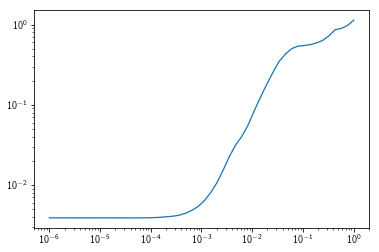

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
346 / 30000 iterations
applying cutoff
... took 98.54190413700417 seconds
(g,i)=(1000,9) ...
find hyperparameter


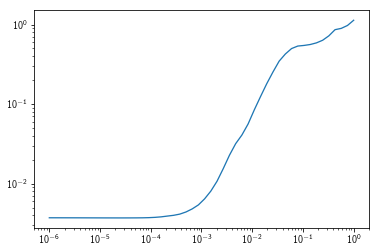

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
342 / 30000 iterations
applying cutoff
... took 97.19211191101931 seconds
(g,i)=(2000,0) ...
find hyperparameter


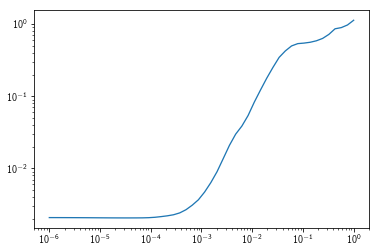

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
329 / 30000 iterations
applying cutoff
... took 93.81278402800672 seconds
(g,i)=(2000,1) ...
find hyperparameter


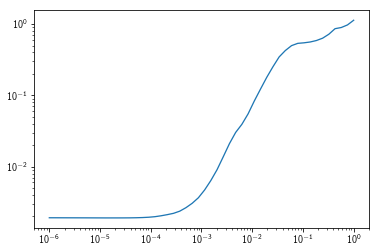

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
345 / 30000 iterations
applying cutoff
... took 97.69554686709307 seconds
(g,i)=(2000,2) ...
find hyperparameter


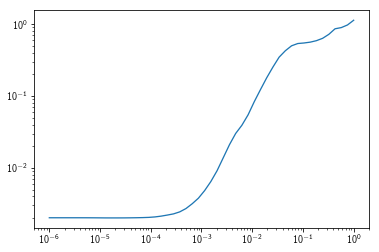

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
351 / 30000 iterations
applying cutoff
... took 99.34219723707065 seconds
(g,i)=(2000,3) ...
find hyperparameter


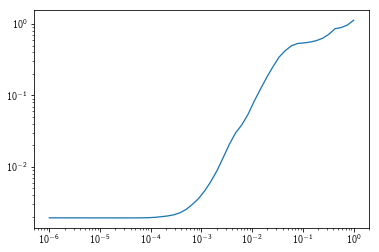

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
326 / 30000 iterations
applying cutoff
... took 92.62549322191626 seconds
(g,i)=(2000,4) ...
find hyperparameter


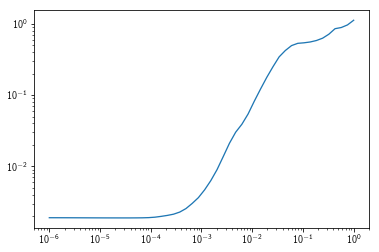

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16


In [ ]:
estimated_rates = dict()
l1_err = dict()
used_alphas = dict()
for g in gillespie_realisations:
    cv_res_g = cv_results[cv_results.gillespie_realisations == g]
    estimated_rates[g] = dict() 
    l1_err[g] = dict()
    used_alphas[g] = dict()
    for i in iids:
        print("(g,i)=({},{}) ...".format(g, i))
        
        print("find hyperparameter")
        cv_res = cv_res_g[cv_res_g.iid == i]
        cv_res = cv_res.sort_values(by="alpha")
        current_alphas = np.array([x for x in cv_res.alpha.values])
        #current_scores = np.array([x for x in cv_res.scores.values])[:,4] # use only 4th fold
        current_scores = np.array([x for x in cv_res.scores.values])[:,1:] # use all except first and average
        current_scores = np.mean(current_scores, axis=1) # average over folds
        #print(current_alphas)
        #print(current_scores)
        min_indices = np.argmin(-current_scores, axis=0)
        optimal_alpha = alphas[min_indices]
        used_alphas[g][i] = optimal_alpha
        plt.plot(current_alphas, -current_scores)
        plt.xscale("log")
        plt.yscale("log")
        plt.show()
        t1 = time.perf_counter()
        
        print("estimating model")
        # @todo check to which trajs this is estimated
        rates, analyse = rs.estimate(alpha=optimal_alpha, gillespie_realisations=g, iid_id=i, 
                                     traj_file_path="./gillespie_trajs_conced_1_3_normal.h5")
        
        print("applying cutoff")
        rates[rates < 0.38] = 0.
        
        estimated_rates[g][i] = rates
        l1_err[g][i] = np.sum(np.abs(rates-desired_rates))
        t2 = time.perf_counter()
        print("... took {} seconds".format(t2-t1))

In [29]:
rates_arr = np.array([ [estimated_rates[g][i] for i in iids] for g in gillespie_realisations])
l1_err_arr = np.array([ [l1_err[g][i] for i in iids] for g in gillespie_realisations])
used_alphas_arr = np.array([ [used_alphas[g][i] for i in iids] for g in gillespie_realisations])

In [34]:
if True:
    np.savez("case3_validation_alphas_and_solutions_averagefolds_normaltraj_20folds.npz", rates=rates_arr, l1_dev=l1_err_arr, alpha_val=used_alphas_arr, gillespie_realisations=gillespie_realisations, desired_rates=desired_rates)

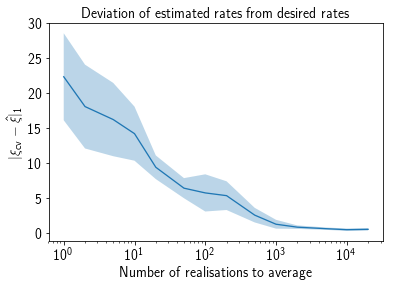

In [31]:
plt.style.use("lm")
mean = np.mean(l1_err_arr, axis=1)
err = np.std(l1_err_arr, axis=1) #/ np.sqrt(10.) # 10 iids
plt.plot(gillespie_realisations, mean)
plt.fill_between(gillespie_realisations, y1=np.clip(mean-err, 0., 1e16), y2=mean+err, alpha=0.3)
plt.xscale("log")
plt.xlabel("Number of realisations to average")
plt.ylabel(r"$|\xi_\mathrm{cv}-\hat{\xi}|_1$")
plt.title("Deviation of estimated rates from desired rates")
ymin, ymax = plt.ylim()
#plt.ylim(-1,ymax)
plt.savefig("case3_convergence_averagefolds_normaltraj_20folds.pdf", bbox_inches="tight", transparent=True)

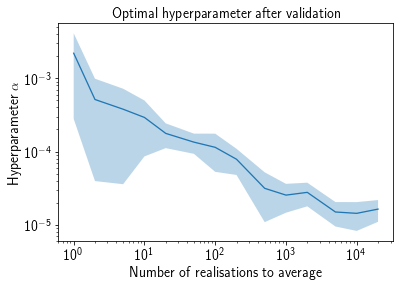

In [32]:

mean = np.mean(used_alphas_arr, axis=1)
err = np.std(used_alphas_arr, axis=1) #/ np.sqrt(10.) # 10 iids
plt.plot(gillespie_realisations, mean)
plt.fill_between(gillespie_realisations, y1=np.clip(mean-err, 1e-8, 1.), y2=mean+err, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of realisations to average")
plt.ylabel(r"Hyperparameter $\alpha$")
plt.title("Optimal hyperparameter after validation")
#ymin, ymax = plt.ylim()
#plt.ylim(-1,ymax)
plt.savefig("case3_best_hyperparameter_averagefolds_normaltraj_20folds.pdf", bbox_inches="tight", transparent=True)

20000


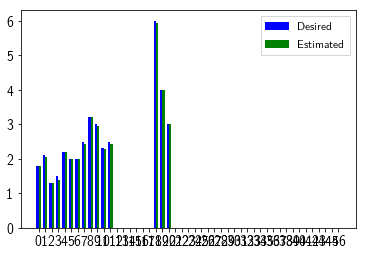

In [33]:
g_idx = -1
i_idx = 3
print(gillespie_realisations[g_idx])
analysis.plot_rates_bar(desired_rates, np.mean(rates_arr[g_idx], axis=0))

#plt.savefig("case2_exemplary_solution_n"+str(gillespie_realisations[g_idx])+".pdf", bbox_inches="tight", transparent=True)

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
100 / 30000 iterations


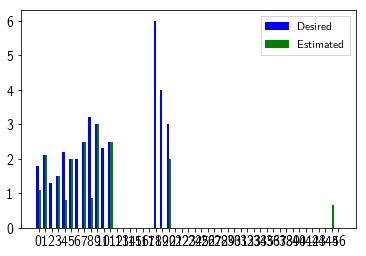

In [33]:
rates, analyse = rs.estimate(alpha=0., gillespie_realisations=20000, iid_id=0, traj_file_path="./gillespie_two_inits_conced.h5")
analysis.plot_rates_bar(desired_rates, rates)

In [41]:
import importlib
importlib.reload(rs)

<module 'run_cv' from '/srv/public/chrisfr/workspace/readdy_learn_pycharm/allegro/run_cv.py'>

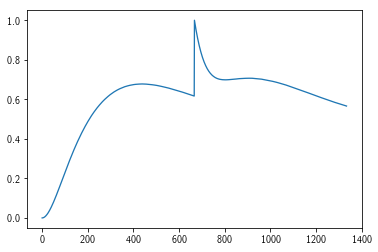

(1334, 9)

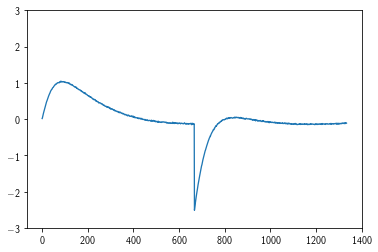

In [64]:
counts, dcounts_dt = rs.get_traj_from_file(filename="./gillespie_trajs_conced_1_3_normal.h5", n_gillespie_realisations=20000, iid=0)
species = 8
plt.plot(counts[:,species], "-", markersize=0.3)
plt.show()
plt.plot(dcounts_dt[:,species], "-", markersize=0.3)
plt.ylim(-3,3)
counts.shape

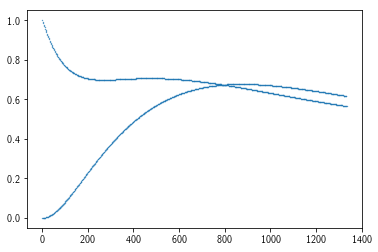

(1334, 9)

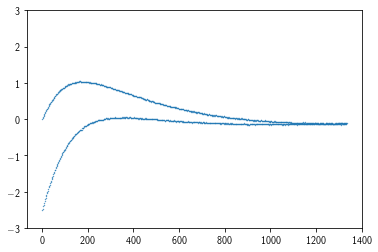

In [65]:
counts, dcounts_dt = rs.get_traj_from_file(filename="./gillespie_trajs_conced_1_3_zipped.h5", n_gillespie_realisations=20000, iid=0)
plt.plot(counts[:,species], ".", markersize=0.7)
plt.show()
plt.plot(dcounts_dt[:,species], ".", markersize=0.7)
plt.ylim(-3,3)
counts.shape

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
362 / 30000 iterations


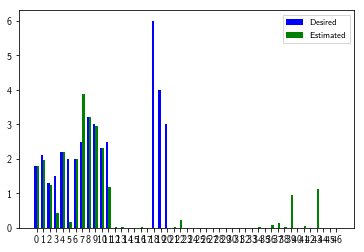

In [30]:
rates, analyse = rs.estimate(alpha=0., gillespie_realisations=20000, iid_id=0, traj_file_path="./gillespie_trajs_otherinit.h5")
analysis.plot_rates_bar(desired_rates, rates)

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
427 / 30000 iterations


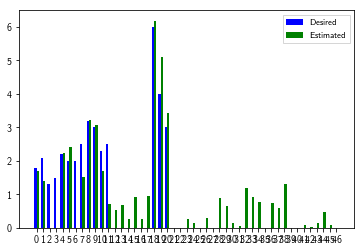

In [31]:
rates, analyse = rs.estimate(alpha=0., gillespie_realisations=500, iid_id=0, traj_file_path="./gillespie_trajs.h5")
analysis.plot_rates_bar(desired_rates, rates)

In [32]:
def generate_lma_noise():
    regulation_network, analysis = rs.get_regulation_network(
        3e-3, lma_noise=0., target_time=2.,
        gillespie_realisations=None, scale=1.)
    traj = analysis.get_traj(0)
    return traj.counts, traj.dcounts_dt, traj.time_step

In [46]:
lma_counts, lma_dcounts_dt, dt =  generate_lma_noise()

obtaining regulation network with dt = 0.003
generating data by integrating the law of mass action with additive lma_noise 0.0
0.003
0.003


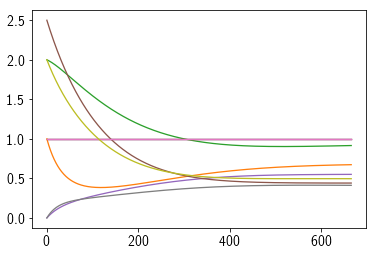

In [47]:
plt.plot(lma_counts)

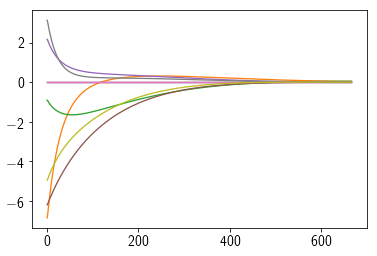

In [48]:
plt.plot(lma_dcounts_dt)

In [57]:
rates, analyse = rs.estimate_counts(0., lma_counts, lma_dcounts_dt, 3e-3)

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
442 / 30000 iterations


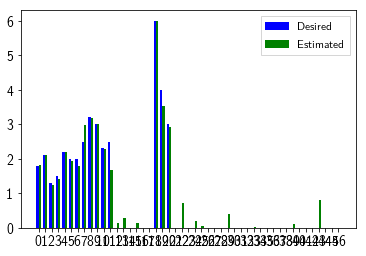

In [58]:
analysis.plot_rates_bar(desired_rates, rates)

In [36]:
counts_3, dcounts_dt_3, _ = rs.generate_counts(3e-3, gillespie_realisations=5000)

run generate_traj with splitter='kfold', dt=0.003, lma_noise=0.0, target_time=2.0, gillespie_realisations=5000
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500
generating data using gillespie kmc averaged over 5000 realisations


0.003
0.003


obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
452 / 30000 iterations


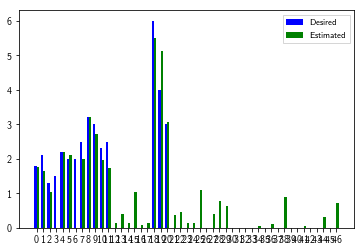

In [37]:
rates, analyse = rs.estimate_counts(0., counts_3, dcounts_dt_3, 3e-3)
analysis.plot_rates_bar(desired_rates, rates)

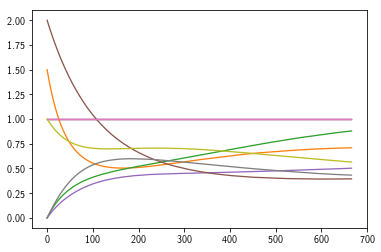

In [38]:
plt.plot(counts_3)

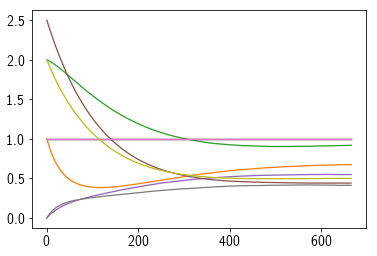

In [66]:
# old, was probably init2?
plt.plot(counts_3)

In [67]:
counts_1, dcounts_dt_1 = rs.get_traj_from_file(filename="./gillespie_trajs.h5", n_gillespie_realisations=20000, iid=0)

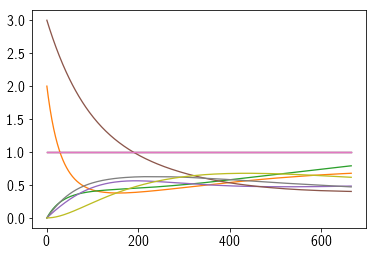

In [68]:
plt.plot(counts_1)